In [23]:
import pandas as pd
import numpy as np
import mne
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:/Users/Jorge/Desktop/Proyecto CDIA/Data/epocData/train.csv")
df.head()

,label,AF3-0,AF3-1,AF3-2,AF3-3,AF3-4,AF3-5,AF3-6,AF3-7,AF3-8,...,AF4-246,AF4-247,AF4-248,AF4-249,AF4-250,AF4-251,AF4-252,AF4-253,AF4-254,AF4-255
0,6,4350.848125,4356.023668,4360.189349,4363.881657,4359.644970,4348.994083,4347.660749,4356.781064,4362.224852,...,4062.564102,4066.682446,4066.729782,4067.124260,4065.783037,4059.487179,4052.236686,4052.773175,4055.802760,4052.867849
1,2,4406.335306,4418.280078,4428.883628,4432.560157,4436.291913,4434.161735,4427.013806,4426.082840,4429.230769,...,4060.828402,4065.956607,4066.216962,4061.577909,4060.094675,4062.366863,4061.601577,4060.560157,4062.998028,4064.591715
2,0,4386.737672,4391.550296,4400.094675,4401.704142,4395.818540,4388.717948,4389.214989,4393.017751,4390.343195,...,4047.731755,4055.715976,4059.621302,4066.406311,4075.092701,4069.270216,4060.536489,4061.467455,4058.556213,4048.867849
3,9,4369.783037,4372.402367,4375.171597,4370.390532,4364.694279,4365.972386,4369.120315,4368.142012,4368.402366,...,4090.571992,4089.372781,4085.183431,4072.260354,4076.820512,4094.477317,4094.453649,4087.021696,4097.601577,4105.522682
4,2,4360.916861,4357.000777,4349.976690,4347.241647,4346.993006,4342.517482,4340.761461,4344.957264,4348.951049,...,4011.763791,4011.608391,4015.804195,4020.559440,4031.188811,4040.730381,4037.094017,4030.815851,4032.183372,4033.799533


Comprobar que los datos esten nivelados

In [3]:
cols = df.columns
channels_n = 14

In [4]:
channels = []
for col in cols[1:]:
    aux = col.split('-')[0]
    if aux not in channels:
        channels.append(aux)

In [5]:
channels

['AF3',
 'F7',
 'F3',
 'FC5',
 'T7',
 'P7',
 'O1',
 'O2',
 'P8',
 'T8',
 'FC6',
 'F4',
 'F8',
 'AF4']

In [84]:
eeg_signal = []
index = 1
for i in range(channels_n):
    eeg_signal.append(list(df.iloc[100, index:index + 256].values))
    index += 256
eeg_signal = np.array(eeg_signal)

In [85]:
ch_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
# Crear una información sobre los canales con las coordenadas espaciales
info = mne.create_info(ch_names=ch_names, sfreq=128, ch_types='eeg')
# Crear un objeto Raw
raw = mne.io.RawArray(eeg_signal, info)


Creating RawArray with float64 data, n_channels=14, n_times=256
    Range : 0 ... 255 =      0.000 ...     1.992 secs
Ready.


In [86]:
# Form the 10-20 montage
mont1020 = mne.channels.make_standard_montage('standard_1020')
# Choose what channels you want to keep 
# Make sure that these channels exist e.g. T1 does not exist in the standard 10-20 EEG system!
kept_channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
ind = [i for (i, channel) in enumerate(mont1020.ch_names) if channel in kept_channels]
mont1020_new = mont1020.copy()
# Keep only the desired channels
mont1020_new.ch_names = [mont1020.ch_names[x] for x in ind]
kept_channel_info = [mont1020.dig[x+3] for x in ind]
# Keep the first three rows as they are the fiducial points information
mont1020_new.dig = mont1020.dig[0:3]+kept_channel_info
#mont1020.plot()
#mont1020_new.plot()

In [87]:
raw = raw.set_montage(mont1020_new)

Effective window size : 2.000 (s)


c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\viz\utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


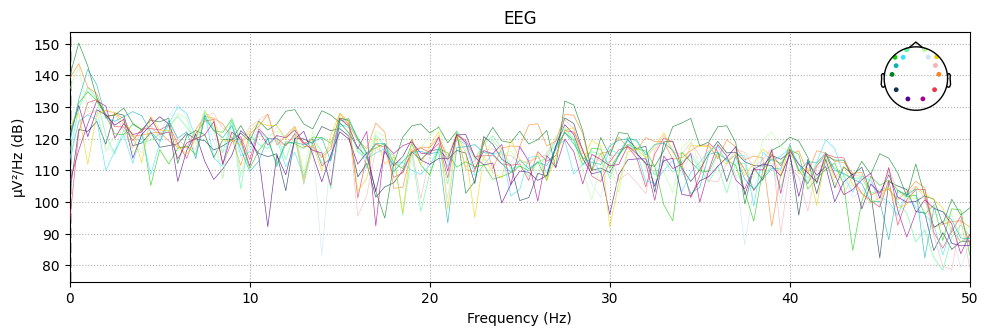

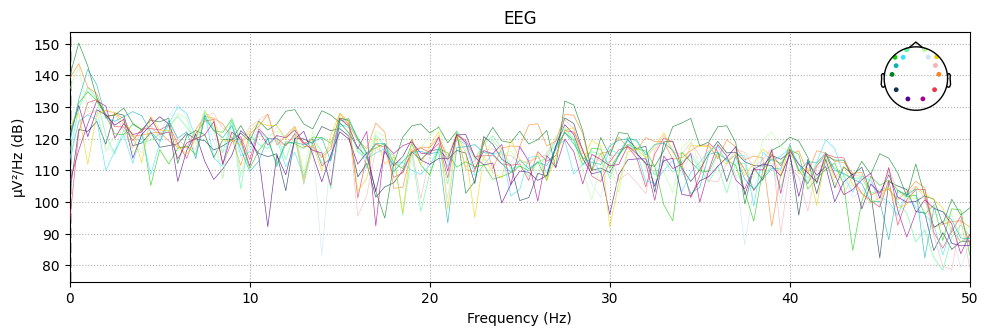

In [88]:
raw.compute_psd(fmax=50).plot(picks="data", exclude="bads")

(256, 14)


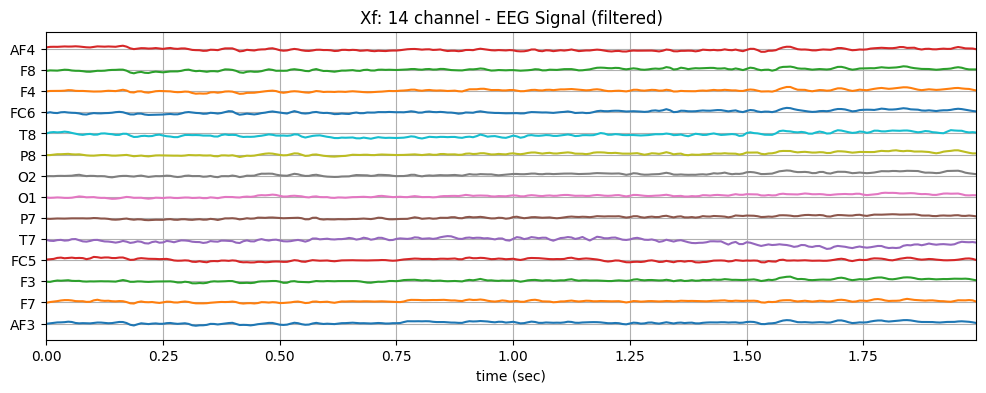

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import spkit as sp
from spkit.data import load_data

X,ch_names = eeg_signal.T, ch_names
fs = 128
Xf = sp.filter_X(X,band=[0.05, 50], btype='bandpass',fs=fs,verbose=0)
print(Xf.shape)
t = np.arange(Xf.shape[0])/fs
plt.figure(figsize=(12,4))
plt.plot(t,Xf+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('Xf: 14 channel - EEG Signal (filtered)')
plt.show()